# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-02-28 16:03:59.621314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2
[-31.60811883 -29.54397214] 1.0
[6.77250291 9.5544703 ] 0.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 1.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

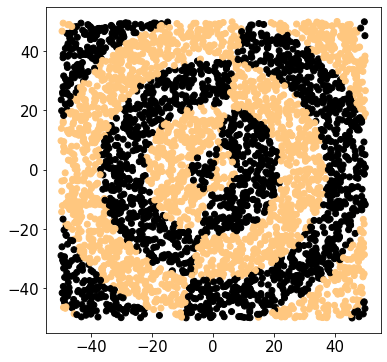

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=2
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

<function matplotlib.pyplot.show(close=None, block=None)>

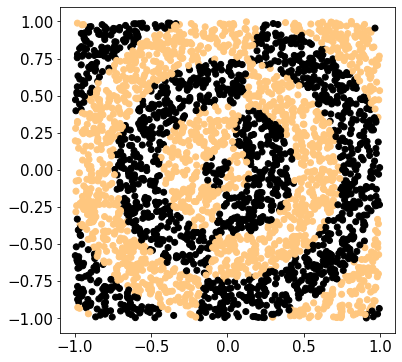

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

plt.figure(figsize = (6,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show

### Define the model with Keras / Tensorflow

In [36]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=1000
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 2)                 6         
                                                                 
 dense_34 (Dense)            (None, 10)                30        
                                                                 
 dense_35 (Dense)            (None, 20)                220       
                                                                 
 dense_36 (Dense)            (None, 40)                840       
                                                                 
 dense_37 (Dense)            (None, 40)                1640      
                                                                 
 dense_38 (Dense)            (None, 20)                820       
                                                                 
 dense_39 (Dense)            (None, 10)               

### Optimization method and cost function

In [37]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [38]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/1000
64/64 - 0s - loss: 0.6923 - accuracy: 0.5316 - val_loss: 0.6941 - val_accuracy: 0.4863 - 478ms/epoch - 7ms/step
Epoch 2/1000
64/64 - 0s - loss: 0.6919 - accuracy: 0.5219 - val_loss: 0.6928 - val_accuracy: 0.5412 - 70ms/epoch - 1ms/step
Epoch 3/1000
64/64 - 0s - loss: 0.6914 - accuracy: 0.5369 - val_loss: 0.6926 - val_accuracy: 0.5512 - 66ms/epoch - 1ms/step
Epoch 4/1000
64/64 - 0s - loss: 0.6907 - accuracy: 0.5391 - val_loss: 0.6920 - val_accuracy: 0.5300 - 66ms/epoch - 1ms/step
Epoch 5/1000
64/64 - 0s - loss: 0.6897 - accuracy: 0.5450 - val_loss: 0.6909 - val_accuracy: 0.5375 - 66ms/epoch - 1ms/step
Epoch 6/1000
64/64 - 0s - loss: 0.6892 - accuracy: 0.5425 - val_loss: 0.6896 - val_accuracy: 0.5537 - 65ms/epoch - 1ms/step
Epoch 7/1000
64/64 - 0s - loss: 0.6882 - accuracy: 0.5425 - val_loss: 0.6900 - val_accuracy: 0.5312 - 64ms/epoch - 997us/step
Epoch 8/1000
64/64 - 0s - loss: 0.6879 - accuracy: 0.5475 - val_loss: 0.6865 - val_accuracy: 0.5312 - 68ms/epoch - 1ms/step
Epoch

Epoch 67/1000
64/64 - 0s - loss: 0.5144 - accuracy: 0.7312 - val_loss: 0.5146 - val_accuracy: 0.7375 - 66ms/epoch - 1ms/step
Epoch 68/1000
64/64 - 0s - loss: 0.5134 - accuracy: 0.7250 - val_loss: 0.5056 - val_accuracy: 0.7475 - 65ms/epoch - 1ms/step
Epoch 69/1000
64/64 - 0s - loss: 0.5092 - accuracy: 0.7253 - val_loss: 0.5199 - val_accuracy: 0.7437 - 63ms/epoch - 986us/step
Epoch 70/1000
64/64 - 0s - loss: 0.5141 - accuracy: 0.7234 - val_loss: 0.5268 - val_accuracy: 0.7475 - 64ms/epoch - 997us/step
Epoch 71/1000
64/64 - 0s - loss: 0.5014 - accuracy: 0.7359 - val_loss: 0.5085 - val_accuracy: 0.7350 - 64ms/epoch - 1ms/step
Epoch 72/1000
64/64 - 0s - loss: 0.5034 - accuracy: 0.7319 - val_loss: 0.5074 - val_accuracy: 0.7375 - 65ms/epoch - 1ms/step
Epoch 73/1000
64/64 - 0s - loss: 0.5047 - accuracy: 0.7297 - val_loss: 0.5257 - val_accuracy: 0.7312 - 64ms/epoch - 1ms/step
Epoch 74/1000
64/64 - 0s - loss: 0.4988 - accuracy: 0.7359 - val_loss: 0.5048 - val_accuracy: 0.7513 - 63ms/epoch - 985us

64/64 - 0s - loss: 0.4485 - accuracy: 0.7506 - val_loss: 0.4589 - val_accuracy: 0.7350 - 68ms/epoch - 1ms/step
Epoch 133/1000
64/64 - 0s - loss: 0.4503 - accuracy: 0.7466 - val_loss: 0.4718 - val_accuracy: 0.7462 - 66ms/epoch - 1ms/step
Epoch 134/1000
64/64 - 0s - loss: 0.4449 - accuracy: 0.7531 - val_loss: 0.4458 - val_accuracy: 0.7775 - 67ms/epoch - 1ms/step
Epoch 135/1000
64/64 - 0s - loss: 0.4413 - accuracy: 0.7613 - val_loss: 0.4468 - val_accuracy: 0.7600 - 65ms/epoch - 1ms/step
Epoch 136/1000
64/64 - 0s - loss: 0.4470 - accuracy: 0.7634 - val_loss: 0.4656 - val_accuracy: 0.7550 - 65ms/epoch - 1ms/step
Epoch 137/1000
64/64 - 0s - loss: 0.4405 - accuracy: 0.7563 - val_loss: 0.4447 - val_accuracy: 0.7638 - 66ms/epoch - 1ms/step
Epoch 138/1000
64/64 - 0s - loss: 0.4488 - accuracy: 0.7484 - val_loss: 0.4507 - val_accuracy: 0.7550 - 66ms/epoch - 1ms/step
Epoch 139/1000
64/64 - 0s - loss: 0.4499 - accuracy: 0.7566 - val_loss: 0.4460 - val_accuracy: 0.7825 - 66ms/epoch - 1ms/step
Epoch 1

64/64 - 0s - loss: 0.4028 - accuracy: 0.7719 - val_loss: 0.4203 - val_accuracy: 0.7675 - 65ms/epoch - 1ms/step
Epoch 198/1000
64/64 - 0s - loss: 0.4289 - accuracy: 0.7569 - val_loss: 0.4101 - val_accuracy: 0.7825 - 64ms/epoch - 994us/step
Epoch 199/1000
64/64 - 0s - loss: 0.4111 - accuracy: 0.7638 - val_loss: 0.4112 - val_accuracy: 0.7713 - 63ms/epoch - 990us/step
Epoch 200/1000
64/64 - 0s - loss: 0.4009 - accuracy: 0.7700 - val_loss: 0.4200 - val_accuracy: 0.7812 - 63ms/epoch - 988us/step
Epoch 201/1000
64/64 - 0s - loss: 0.4518 - accuracy: 0.7475 - val_loss: 0.5614 - val_accuracy: 0.7200 - 63ms/epoch - 989us/step
Epoch 202/1000
64/64 - 0s - loss: 0.4187 - accuracy: 0.7634 - val_loss: 0.3996 - val_accuracy: 0.7825 - 65ms/epoch - 1ms/step
Epoch 203/1000
64/64 - 0s - loss: 0.4012 - accuracy: 0.7684 - val_loss: 0.4144 - val_accuracy: 0.7663 - 66ms/epoch - 1ms/step
Epoch 204/1000
64/64 - 0s - loss: 0.4182 - accuracy: 0.7647 - val_loss: 0.4056 - val_accuracy: 0.7750 - 66ms/epoch - 1ms/step

64/64 - 0s - loss: 0.3690 - accuracy: 0.7966 - val_loss: 0.3766 - val_accuracy: 0.8150 - 66ms/epoch - 1ms/step
Epoch 263/1000
64/64 - 0s - loss: 0.3709 - accuracy: 0.7928 - val_loss: 0.3647 - val_accuracy: 0.8087 - 65ms/epoch - 1ms/step
Epoch 264/1000
64/64 - 0s - loss: 0.3629 - accuracy: 0.7987 - val_loss: 0.3964 - val_accuracy: 0.8163 - 63ms/epoch - 988us/step
Epoch 265/1000
64/64 - 0s - loss: 0.3776 - accuracy: 0.8003 - val_loss: 0.3704 - val_accuracy: 0.8150 - 64ms/epoch - 997us/step
Epoch 266/1000
64/64 - 0s - loss: 0.3650 - accuracy: 0.8041 - val_loss: 0.3800 - val_accuracy: 0.8225 - 70ms/epoch - 1ms/step
Epoch 267/1000
64/64 - 0s - loss: 0.3667 - accuracy: 0.8003 - val_loss: 0.3744 - val_accuracy: 0.7925 - 70ms/epoch - 1ms/step
Epoch 268/1000
64/64 - 0s - loss: 0.3784 - accuracy: 0.7894 - val_loss: 0.3694 - val_accuracy: 0.8138 - 68ms/epoch - 1ms/step
Epoch 269/1000
64/64 - 0s - loss: 0.3697 - accuracy: 0.7953 - val_loss: 0.3828 - val_accuracy: 0.7950 - 68ms/epoch - 1ms/step
Epo

64/64 - 0s - loss: 0.2776 - accuracy: 0.8672 - val_loss: 0.2813 - val_accuracy: 0.8650 - 65ms/epoch - 1ms/step
Epoch 328/1000
64/64 - 0s - loss: 0.2825 - accuracy: 0.8672 - val_loss: 0.3019 - val_accuracy: 0.8763 - 64ms/epoch - 996us/step
Epoch 329/1000
64/64 - 0s - loss: 0.2840 - accuracy: 0.8675 - val_loss: 0.2781 - val_accuracy: 0.8712 - 63ms/epoch - 989us/step
Epoch 330/1000
64/64 - 0s - loss: 0.3115 - accuracy: 0.8556 - val_loss: 0.2673 - val_accuracy: 0.8863 - 63ms/epoch - 986us/step
Epoch 331/1000
64/64 - 0s - loss: 0.2768 - accuracy: 0.8719 - val_loss: 0.2842 - val_accuracy: 0.8763 - 64ms/epoch - 997us/step
Epoch 332/1000
64/64 - 0s - loss: 0.2780 - accuracy: 0.8709 - val_loss: 0.3173 - val_accuracy: 0.8400 - 63ms/epoch - 990us/step
Epoch 333/1000
64/64 - 0s - loss: 0.2894 - accuracy: 0.8731 - val_loss: 0.3290 - val_accuracy: 0.8450 - 64ms/epoch - 994us/step
Epoch 334/1000
64/64 - 0s - loss: 0.2945 - accuracy: 0.8625 - val_loss: 0.2656 - val_accuracy: 0.8687 - 64ms/epoch - 1ms/

Epoch 392/1000
64/64 - 0s - loss: 0.2332 - accuracy: 0.8884 - val_loss: 0.2639 - val_accuracy: 0.8712 - 65ms/epoch - 1ms/step
Epoch 393/1000
64/64 - 0s - loss: 0.2538 - accuracy: 0.8794 - val_loss: 0.3489 - val_accuracy: 0.8350 - 63ms/epoch - 991us/step
Epoch 394/1000
64/64 - 0s - loss: 0.2802 - accuracy: 0.8631 - val_loss: 0.2810 - val_accuracy: 0.8587 - 63ms/epoch - 985us/step
Epoch 395/1000
64/64 - 0s - loss: 0.2462 - accuracy: 0.8803 - val_loss: 0.2908 - val_accuracy: 0.8637 - 63ms/epoch - 991us/step
Epoch 396/1000
64/64 - 0s - loss: 0.2538 - accuracy: 0.8772 - val_loss: 0.2314 - val_accuracy: 0.8963 - 63ms/epoch - 982us/step
Epoch 397/1000
64/64 - 0s - loss: 0.2472 - accuracy: 0.8822 - val_loss: 0.2549 - val_accuracy: 0.8763 - 63ms/epoch - 985us/step
Epoch 398/1000
64/64 - 0s - loss: 0.2347 - accuracy: 0.8866 - val_loss: 0.2500 - val_accuracy: 0.8737 - 64ms/epoch - 993us/step
Epoch 399/1000
64/64 - 0s - loss: 0.2373 - accuracy: 0.8850 - val_loss: 0.2540 - val_accuracy: 0.8900 - 63

Epoch 457/1000
64/64 - 0s - loss: 0.2113 - accuracy: 0.9003 - val_loss: 0.2957 - val_accuracy: 0.8725 - 68ms/epoch - 1ms/step
Epoch 458/1000
64/64 - 0s - loss: 0.2058 - accuracy: 0.9000 - val_loss: 0.2221 - val_accuracy: 0.9013 - 65ms/epoch - 1ms/step
Epoch 459/1000
64/64 - 0s - loss: 0.2235 - accuracy: 0.8869 - val_loss: 0.2468 - val_accuracy: 0.8838 - 65ms/epoch - 1ms/step
Epoch 460/1000
64/64 - 0s - loss: 0.2116 - accuracy: 0.8994 - val_loss: 0.2699 - val_accuracy: 0.8675 - 65ms/epoch - 1ms/step
Epoch 461/1000
64/64 - 0s - loss: 0.2000 - accuracy: 0.9091 - val_loss: 0.2239 - val_accuracy: 0.8963 - 64ms/epoch - 997us/step
Epoch 462/1000
64/64 - 0s - loss: 0.2039 - accuracy: 0.9025 - val_loss: 0.2277 - val_accuracy: 0.8938 - 64ms/epoch - 1ms/step
Epoch 463/1000
64/64 - 0s - loss: 0.1977 - accuracy: 0.9059 - val_loss: 0.2387 - val_accuracy: 0.8788 - 64ms/epoch - 1ms/step
Epoch 464/1000
64/64 - 0s - loss: 0.2053 - accuracy: 0.9038 - val_loss: 0.2204 - val_accuracy: 0.8938 - 64ms/epoch -

Epoch 522/1000
64/64 - 0s - loss: 0.1699 - accuracy: 0.9259 - val_loss: 0.2560 - val_accuracy: 0.8825 - 65ms/epoch - 1ms/step
Epoch 523/1000
64/64 - 0s - loss: 0.1706 - accuracy: 0.9256 - val_loss: 0.1814 - val_accuracy: 0.9137 - 64ms/epoch - 993us/step
Epoch 524/1000
64/64 - 0s - loss: 0.1690 - accuracy: 0.9287 - val_loss: 0.1829 - val_accuracy: 0.9187 - 64ms/epoch - 1ms/step
Epoch 525/1000
64/64 - 0s - loss: 0.1672 - accuracy: 0.9297 - val_loss: 0.1902 - val_accuracy: 0.9212 - 64ms/epoch - 1ms/step
Epoch 526/1000
64/64 - 0s - loss: 0.1649 - accuracy: 0.9312 - val_loss: 0.1693 - val_accuracy: 0.9250 - 63ms/epoch - 989us/step
Epoch 527/1000
64/64 - 0s - loss: 0.1686 - accuracy: 0.9303 - val_loss: 0.1630 - val_accuracy: 0.9300 - 63ms/epoch - 986us/step
Epoch 528/1000
64/64 - 0s - loss: 0.1518 - accuracy: 0.9359 - val_loss: 0.1869 - val_accuracy: 0.9212 - 64ms/epoch - 1ms/step
Epoch 529/1000
64/64 - 0s - loss: 0.1525 - accuracy: 0.9353 - val_loss: 0.1997 - val_accuracy: 0.9162 - 64ms/epo

Epoch 587/1000
64/64 - 0s - loss: 0.1249 - accuracy: 0.9503 - val_loss: 0.2141 - val_accuracy: 0.9112 - 65ms/epoch - 1ms/step
Epoch 588/1000
64/64 - 0s - loss: 0.1718 - accuracy: 0.9325 - val_loss: 0.1908 - val_accuracy: 0.9162 - 63ms/epoch - 989us/step
Epoch 589/1000
64/64 - 0s - loss: 0.1351 - accuracy: 0.9456 - val_loss: 0.1521 - val_accuracy: 0.9300 - 64ms/epoch - 997us/step
Epoch 590/1000
64/64 - 0s - loss: 0.1201 - accuracy: 0.9484 - val_loss: 0.1597 - val_accuracy: 0.9262 - 64ms/epoch - 993us/step
Epoch 591/1000
64/64 - 0s - loss: 0.1407 - accuracy: 0.9438 - val_loss: 0.1482 - val_accuracy: 0.9337 - 64ms/epoch - 996us/step
Epoch 592/1000
64/64 - 0s - loss: 0.1463 - accuracy: 0.9369 - val_loss: 0.1410 - val_accuracy: 0.9400 - 64ms/epoch - 996us/step
Epoch 593/1000
64/64 - 0s - loss: 0.1353 - accuracy: 0.9450 - val_loss: 0.2097 - val_accuracy: 0.9150 - 64ms/epoch - 1ms/step
Epoch 594/1000
64/64 - 0s - loss: 0.1473 - accuracy: 0.9388 - val_loss: 0.1701 - val_accuracy: 0.9262 - 64ms

Epoch 652/1000
64/64 - 0s - loss: 0.1232 - accuracy: 0.9509 - val_loss: 0.1811 - val_accuracy: 0.9225 - 75ms/epoch - 1ms/step
Epoch 653/1000
64/64 - 0s - loss: 0.1272 - accuracy: 0.9450 - val_loss: 0.1518 - val_accuracy: 0.9312 - 66ms/epoch - 1ms/step
Epoch 654/1000
64/64 - 0s - loss: 0.1182 - accuracy: 0.9475 - val_loss: 0.1629 - val_accuracy: 0.9325 - 63ms/epoch - 989us/step
Epoch 655/1000
64/64 - 0s - loss: 0.1364 - accuracy: 0.9425 - val_loss: 0.1344 - val_accuracy: 0.9413 - 65ms/epoch - 1ms/step
Epoch 656/1000
64/64 - 0s - loss: 0.1118 - accuracy: 0.9566 - val_loss: 0.1541 - val_accuracy: 0.9362 - 70ms/epoch - 1ms/step
Epoch 657/1000
64/64 - 0s - loss: 0.1176 - accuracy: 0.9509 - val_loss: 0.1498 - val_accuracy: 0.9300 - 70ms/epoch - 1ms/step
Epoch 658/1000
64/64 - 0s - loss: 0.1426 - accuracy: 0.9403 - val_loss: 0.1475 - val_accuracy: 0.9300 - 70ms/epoch - 1ms/step
Epoch 659/1000
64/64 - 0s - loss: 0.1210 - accuracy: 0.9478 - val_loss: 0.1527 - val_accuracy: 0.9350 - 69ms/epoch -

Epoch 717/1000
64/64 - 0s - loss: 0.1178 - accuracy: 0.9525 - val_loss: 0.1816 - val_accuracy: 0.9275 - 64ms/epoch - 999us/step
Epoch 718/1000
64/64 - 0s - loss: 0.1507 - accuracy: 0.9394 - val_loss: 0.2154 - val_accuracy: 0.9200 - 64ms/epoch - 995us/step
Epoch 719/1000
64/64 - 0s - loss: 0.1723 - accuracy: 0.9303 - val_loss: 0.1879 - val_accuracy: 0.9325 - 86ms/epoch - 1ms/step
Epoch 720/1000
64/64 - 0s - loss: 0.1292 - accuracy: 0.9441 - val_loss: 0.1728 - val_accuracy: 0.9275 - 66ms/epoch - 1ms/step
Epoch 721/1000
64/64 - 0s - loss: 0.1183 - accuracy: 0.9519 - val_loss: 0.1422 - val_accuracy: 0.9362 - 65ms/epoch - 1ms/step
Epoch 722/1000
64/64 - 0s - loss: 0.1177 - accuracy: 0.9516 - val_loss: 0.1489 - val_accuracy: 0.9337 - 63ms/epoch - 978us/step
Epoch 723/1000
64/64 - 0s - loss: 0.1211 - accuracy: 0.9509 - val_loss: 0.1846 - val_accuracy: 0.9275 - 64ms/epoch - 1ms/step
Epoch 724/1000
64/64 - 0s - loss: 0.1560 - accuracy: 0.9413 - val_loss: 0.1785 - val_accuracy: 0.9375 - 64ms/epo

Epoch 782/1000
64/64 - 0s - loss: 0.1696 - accuracy: 0.9309 - val_loss: 0.1750 - val_accuracy: 0.9162 - 67ms/epoch - 1ms/step
Epoch 783/1000
64/64 - 0s - loss: 0.1450 - accuracy: 0.9419 - val_loss: 0.1389 - val_accuracy: 0.9438 - 65ms/epoch - 1ms/step
Epoch 784/1000
64/64 - 0s - loss: 0.1121 - accuracy: 0.9534 - val_loss: 0.1799 - val_accuracy: 0.9312 - 67ms/epoch - 1ms/step
Epoch 785/1000
64/64 - 0s - loss: 0.1156 - accuracy: 0.9509 - val_loss: 0.1485 - val_accuracy: 0.9362 - 65ms/epoch - 1ms/step
Epoch 786/1000
64/64 - 0s - loss: 0.1115 - accuracy: 0.9528 - val_loss: 0.1328 - val_accuracy: 0.9463 - 64ms/epoch - 999us/step
Epoch 787/1000
64/64 - 0s - loss: 0.1117 - accuracy: 0.9550 - val_loss: 0.2052 - val_accuracy: 0.9075 - 63ms/epoch - 992us/step
Epoch 788/1000
64/64 - 0s - loss: 0.1523 - accuracy: 0.9366 - val_loss: 0.1459 - val_accuracy: 0.9388 - 64ms/epoch - 996us/step
Epoch 789/1000
64/64 - 0s - loss: 0.1091 - accuracy: 0.9550 - val_loss: 0.1403 - val_accuracy: 0.9350 - 63ms/epo

Epoch 847/1000
64/64 - 0s - loss: 0.1502 - accuracy: 0.9341 - val_loss: 0.1734 - val_accuracy: 0.9275 - 62ms/epoch - 965us/step
Epoch 848/1000
64/64 - 0s - loss: 0.1117 - accuracy: 0.9538 - val_loss: 0.1552 - val_accuracy: 0.9325 - 63ms/epoch - 984us/step
Epoch 849/1000
64/64 - 0s - loss: 0.1097 - accuracy: 0.9544 - val_loss: 0.1289 - val_accuracy: 0.9438 - 63ms/epoch - 984us/step
Epoch 850/1000
64/64 - 0s - loss: 0.1278 - accuracy: 0.9453 - val_loss: 0.1741 - val_accuracy: 0.9287 - 63ms/epoch - 982us/step
Epoch 851/1000
64/64 - 0s - loss: 0.1186 - accuracy: 0.9509 - val_loss: 0.1721 - val_accuracy: 0.9350 - 68ms/epoch - 1ms/step
Epoch 852/1000
64/64 - 0s - loss: 0.1168 - accuracy: 0.9494 - val_loss: 0.1244 - val_accuracy: 0.9463 - 70ms/epoch - 1ms/step
Epoch 853/1000
64/64 - 0s - loss: 0.1233 - accuracy: 0.9500 - val_loss: 0.1982 - val_accuracy: 0.9125 - 69ms/epoch - 1ms/step
Epoch 854/1000
64/64 - 0s - loss: 0.1152 - accuracy: 0.9488 - val_loss: 0.1346 - val_accuracy: 0.9388 - 65ms/e

Epoch 912/1000
64/64 - 0s - loss: 0.1176 - accuracy: 0.9513 - val_loss: 0.2242 - val_accuracy: 0.9038 - 63ms/epoch - 981us/step
Epoch 913/1000
64/64 - 0s - loss: 0.1281 - accuracy: 0.9450 - val_loss: 0.1247 - val_accuracy: 0.9488 - 64ms/epoch - 1ms/step
Epoch 914/1000
64/64 - 0s - loss: 0.1208 - accuracy: 0.9494 - val_loss: 0.1292 - val_accuracy: 0.9388 - 63ms/epoch - 988us/step
Epoch 915/1000
64/64 - 0s - loss: 0.1167 - accuracy: 0.9488 - val_loss: 0.1700 - val_accuracy: 0.9212 - 63ms/epoch - 987us/step
Epoch 916/1000
64/64 - 0s - loss: 0.1570 - accuracy: 0.9281 - val_loss: 0.1804 - val_accuracy: 0.9287 - 63ms/epoch - 987us/step
Epoch 917/1000
64/64 - 0s - loss: 0.1031 - accuracy: 0.9575 - val_loss: 0.1395 - val_accuracy: 0.9488 - 62ms/epoch - 969us/step
Epoch 918/1000
64/64 - 0s - loss: 0.1156 - accuracy: 0.9522 - val_loss: 0.1544 - val_accuracy: 0.9388 - 63ms/epoch - 986us/step
Epoch 919/1000
64/64 - 0s - loss: 0.0925 - accuracy: 0.9641 - val_loss: 0.1402 - val_accuracy: 0.9450 - 63

Epoch 977/1000
64/64 - 0s - loss: 0.0901 - accuracy: 0.9634 - val_loss: 0.1179 - val_accuracy: 0.9450 - 86ms/epoch - 1ms/step
Epoch 978/1000
64/64 - 0s - loss: 0.1149 - accuracy: 0.9522 - val_loss: 0.1974 - val_accuracy: 0.9312 - 85ms/epoch - 1ms/step
Epoch 979/1000
64/64 - 0s - loss: 0.1248 - accuracy: 0.9494 - val_loss: 0.1313 - val_accuracy: 0.9438 - 68ms/epoch - 1ms/step
Epoch 980/1000
64/64 - 0s - loss: 0.1053 - accuracy: 0.9597 - val_loss: 0.1481 - val_accuracy: 0.9400 - 68ms/epoch - 1ms/step
Epoch 981/1000
64/64 - 0s - loss: 0.1671 - accuracy: 0.9341 - val_loss: 0.1695 - val_accuracy: 0.9250 - 63ms/epoch - 982us/step
Epoch 982/1000
64/64 - 0s - loss: 0.1108 - accuracy: 0.9528 - val_loss: 0.1510 - val_accuracy: 0.9337 - 63ms/epoch - 986us/step
Epoch 983/1000
64/64 - 0s - loss: 0.1170 - accuracy: 0.9516 - val_loss: 0.2673 - val_accuracy: 0.9137 - 64ms/epoch - 999us/step
Epoch 984/1000
64/64 - 0s - loss: 0.1306 - accuracy: 0.9481 - val_loss: 0.1476 - val_accuracy: 0.9413 - 65ms/epo

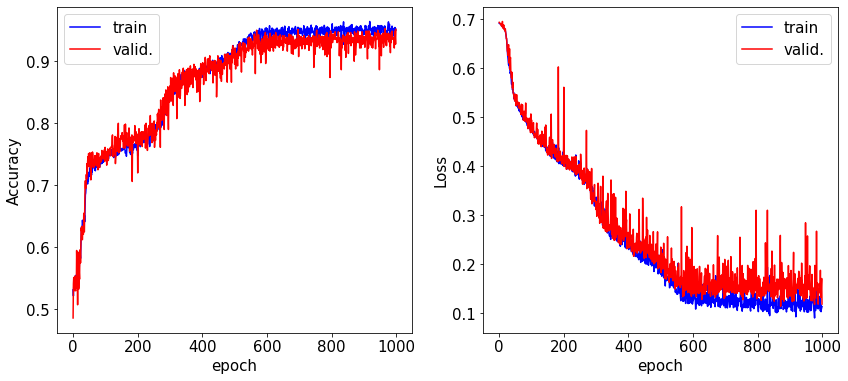

In [39]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [40]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 476us/step


<function matplotlib.pyplot.show(close=None, block=None)>

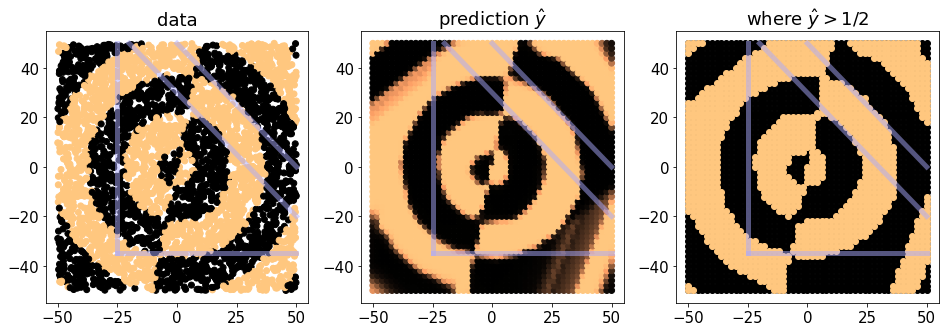

In [41]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show